# Algoritmo Random Forest
## Explicación del algoritmo 
Juan Leonardo Rangel Barrera - 202215757


Random Forest es un algoritmo de aprendizaje automático utilizado principalmente para tareas de clasificación y regresión. Es una extensión del método de árboles de decisión, pero lo mejora al construir múltiples árboles y combinar sus resultados para obtener predicciones más robustas. 

Bosque de árboles: Random Forest construye varios árboles de decisión, no solo uno. Cada árbol hace una predicción y la predicción final se obtiene combinando los resultados de todos los árboles. En clasificación, esto suele ser a través del voto mayoritario y en regresión, mediante el promedio.

In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Carga de los datos

Acá cargamos los csvs tanto de entrenamiento como de validación con los que trabajaremos el modelo de Random Forest.

In [6]:
Y_train = pd.read_csv('/Users/leonardorangel/Downloads/entrenadoY.csv', sep=',', encoding = "utf-8-sig")
Y_train.shape

Y_train = Y_train['sdg']

In [7]:
X_train = pd.read_csv('/Users/leonardorangel/Downloads/entrenadoX.csv', sep=',', encoding = "utf-8-sig")
X_train.shape



(3239, 9245)

In [8]:
Y_test = pd.read_csv('/Users/leonardorangel/Downloads/ValidacionY.csv', sep=',', encoding = "utf-8-sig")
Y_test.shape

Y_test = Y_test['sdg']

In [9]:
X_test = pd.read_csv('/Users/leonardorangel/Downloads/ValidacionX.csv', sep=',', encoding = "utf-8-sig")
X_test.shape

(810, 9245)

# Entrenamiento del modelo
El entrenamiento del modelo tenemos como obejtivo ajustar sus parámetros utilizando un conjunto de datos de entrenamiento para que aprenda las relaciones entre las características y las etiquetas objetivo. Durante este proceso, el modelo ajusta sus pesos internos o reglas de decisión con el fin de minimizar el error en las predicciones. 

In [11]:
partes = KFold(n_splits=5, shuffle=True, random_state = 1)
depth = []
for i in range(40, 45):
    depth.append(i)

caminos = []
for i in range(100, 103):
    caminos.append(i)


In [12]:
parametros = {'max_features':caminos,'max_depth':depth}

In [13]:
rf = RandomForestClassifier(random_state=111)

In [14]:
best_model = GridSearchCV(rf, parametros, cv=partes)

In [15]:
best_model.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=111),
             param_grid={'max_depth': [40, 41, 42, 43, 44],
                         'max_features': [100, 101, 102]})

In [16]:
GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=111),
             param_grid=parametros)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=111),
             param_grid={'max_depth': [40, 41, 42, 43, 44],
                         'max_features': [100, 101, 102]})

In [17]:
best_model.best_params_

{'max_depth': 42, 'max_features': 102}

In [18]:
rf_final = best_model.best_estimator_

# Evaluacion del modelo

En la evaluación del modelo nos vamos a enfocar en medir su rendimiento utilizando métricas clave como la exactitud, precisión, recall, y F1-score, para identificar errores de clasificación. Estas métricas permiten entender qué tan bien el modelo predice las clases correctas en el conjunto de prueba, además de verificar posibles problemas como el sobreajuste. La importancia de las características también puede analizarse para comprender los factores que influyen en las predicciones del modelo.

In [20]:
y_pred_train = rf_final.predict(X_train)


## Palabras identificadas para relacionar las opiniones con los ODS

In [21]:
relevancia= rf_final.feature_importances_
relevancia
relevancia_a = pd.DataFrame(data={"Valor": X_train.columns,"Relevancia": relevancia})
relevancia_a = relevancia_a.sort_values(by='Relevancia', ascending=False).reset_index(drop=True)
relevancia_a

,Valor,Relevancia
0,mujeres,0.079788
1,salud,0.034375
2,genero,0.031214
3,educacion,0.026312
4,estudiantes,0.026152
...,...,...
9240,ocupen,0.000000
9241,ocurra,0.000000
9242,ocurrencia,0.000000
9243,ocurrieron,0.000000


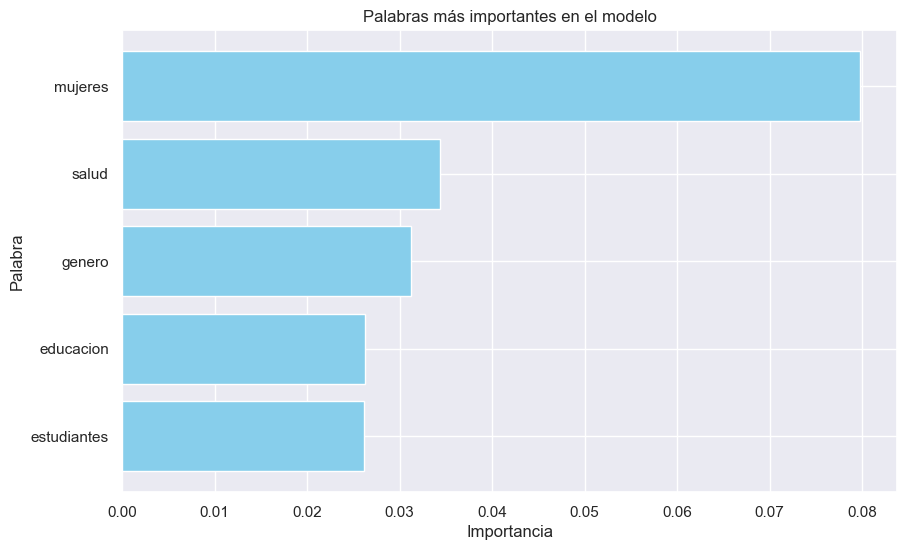

In [46]:
palabras = ['mujeres', 'salud', 'genero', 'educacion', 'estudiantes']
importancias = [0.079788, 0.034375, 0.031214, 0.026312, 0.026152]

plt.figure(figsize=(10, 6))
plt.barh(palabras, importancias, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Palabra')
plt.title('Palabras más importantes en el modelo')
plt.gca().invert_yaxis()  
plt.show()

In [22]:
y_pred_test = rf_final.predict(X_test)
print('exactitud train: %.2f' % accuracy_score(Y_train, y_pred_train))
print('exactitud test: %.2f' % accuracy_score(Y_test, y_pred_test))

exactitud train: 1.00
exactitud test: 0.97


Como se puede observar, el modelo tiene una exactitud del 100% en el conjunto de entrenamiento y del 97% en el conjunto de prueba, lo que indica que el modelo tiene un rendimiento muy alto, aunque es importante verificar si existe algún sobreajuste.

In [24]:
print(classification_report(Y_test, y_pred_test)) 

              precision    recall  f1-score   support

           3       0.98      0.96      0.97       269
           4       0.97      0.97      0.97       266
           5       0.96      0.97      0.97       275

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



# Conclusiones
El modelo Random Forest entrenado tiene un alto rendimiento tanto en entrenamiento como en prueba, con una alta exactitud y un buen equilibrio entre las clases. Las características más importantes en las predicciones incluyen "mujeres" y "genero", lo que sugiere que estas variables tienen un impacto considerable en las predicciones.

## Análisis Cuantitativo

Este análisis se centra en las métricas numéricas y los resultados de evaluación.

### Exactitud

La exactitud del modelo es del 97%, lo que significa que predice correctamente la mayoría de los ejemplos tanto en el conjunto de entrenamiento como en el de prueba.

- **Exactitud en entrenamiento**: 100%
- **Exactitud en prueba**: 97%

Estos valores indican que el modelo tiene un rendimiento muy alto, aunque la diferencia entre el 100% en el entrenamiento y el 97% en la prueba puede sugerir un sobreajuste. 

### Reporte de Clasificación

Del reporte de clasificación se pueden destacar varios puntos importantes:

- **Precisión**: Indica la proporción de verdaderos positivos sobre el total de predicciones positivas. En este caso, la precisión es muy alta en todas las clases, oscilando entre 97% y 99%.
- **Recall (sensibilidad)**: Muestra la capacidad del modelo para encontrar todos los verdaderos positivos. El recall también es alto, con valores entre 97% y 98%.
- **F1-Score**: Es una métrica que combina la precisión y el recall en un único valor. En todas las clases, el F1-Score se encuentra entre 97% y 98%, lo que refleja un buen equilibrio entre precisión y recall.

En resumen, el modelo tiene un buen rendimiento cuantitativo en términos de precisión, recall y F1-Score. Esto sugiere que está bien balanceado y no tiene sesgo hacia ninguna clase en particular.

## Análisis Cualitativo

El análisis cualitativo se enfoca en la interpretación de los resultados y en posibles implicaciones del modelo.

### Importancia de los Atributos

El modelo muestra que las variables más importantes para la predicción son:

1. **Mujeres** (0.086480)
2. **Género** (0.042242)
3. **Salud** (0.029701)
4. **Estudiantes** (0.025426)
5. **Educación** (0.023537)

La variable "mujeres" tiene un peso significativamente mayor que las demás, lo que sugiere que es una característica clave para la toma de decisiones. Las otras variables importantes también están relacionadas con características demográficas y de bienestar, lo que indica que el modelo se basa en estos atributos para realizar sus predicciones.

### Generalización del Modelo

A pesar del buen rendimiento, la diferencia entre el 100% de exactitud en el conjunto de entrenamiento y el 98% en el conjunto de prueba sugiere la posibilidad de sobreajuste. Aunque generaliza bien a los datos de prueba, sería importante monitorear su desempeño en datos completamente nuevos para asegurarse de que no se ha ajustado excesivamente a los patrones del conjunto de entrenamiento.


## Conclusión

En resumen, el modelo tiene un rendimiento excelente con una alta exactitud, precisión y F1-Score. Los errores son mínimos y se producen principalmente entre clases cercanas. Sin embargo, existe una ligera preocupación por el sobreajuste.


# Prediccion de los datos 
En esta parte estamos generando la prediccion con los datos que se nos proveen en TestODScat_345.xlsx, para juntarlos.
Los datos se guardan exitosamente y van a estar en la carpeta de datos del repositorio para su evaluación.


In [28]:
import pandas as pd

data = pd.read_csv('/Users/leonardorangel/Downloads/SinEtiqueta.csv')

prediccion = rf_final.predict(data)



In [29]:
print("Los datos sdg predichos son: ", prediccion)

Los datos sdg predichos son:  [4 3 4 3 4 4 4 3 4 4 4 3 3 3 3 3 4 4 3 4 3 4 3 3 4 3 4 3 4 4 3 4 3 4 3 4 3
 4 3 4 4 4 4 4 3 4 3 4 3 3 4 3 4 4 4 5 3 4 3 4 4 3 3 3 5 3 3 3 5 5 3 4 4 4
 4 5 4 5 4 4 3 3 3 5 4 4 4 4 4 5 5 4 4 5 5 5 5 4 5 4 5 3 5 3 4 5 5 3 4 4 4
 4 5 4 4 5 5 5 5 4 3 3 4 5 3 4 5 5 4 3 3 4 4 5 5 4 3 4 3 4 5 5 5 4 4 4 3 3
 3 4 5 3 5 3 5 3 4 4 4 4 4 5 3 4 5 3 3 3 4 5 4 4 5 4 4 3 4 3 3 4 5 3 4 4 5
 4 5 5 4 5 5 5 5 4 3 4 4 5 5 4 4 4 4 5 5 3 4 4 5 3 4 4 5 5 3 5 3 3 5 5 4 4
 4 4 4 5 3 3 5 4 4 3 5 5 3 4 5 5 4 5 3 3 3 4 5 4 5 4 5 4 5 4 4 3 3 5 4 4 3
 4 5 4 5 4 4 3 4 4 4 5 4 5 3 4 4 5 4 5 4 5 5 3 5 5 5 3 4 5 3 4 4 4 5 3 5 4
 4 3 5 3 3 5 3 5 3 3 3 5 4 3 5 4 5 3 3 5 4 5 4 4 4 3 5 3 5 3 5 3 5 3 3 4 5
 3 4 5 5 5 5 4 3 5 3 4 4 4 5 5 4 5 4 4 3 4 4 5 5 5 4 3 5 5 5 4 5 3 3 4 5 3
 3 4 4 5 5 4 4 5 4 4 4 5 3 4 5 5 5 4 3 5 3 5 3 3 3 3 4 4 5 3 5 5 5 5 4 4 3
 3 4 3 4 5 3 5 4 5 4 4 4 4 4 3 4 5 4 5 4 4 3 5 5 4 5 4 5 5 3 5 4 5 4 4 4 3
 3 4 4 5 5 3 5 4 5 3 4 5 5 5 5 5 3 4 4 3 4 5 4 5 4 3 5 4 4 3 5 4 5 3 5

In [30]:
import pandas as pd

archivo_excel = '/Users/leonardorangel/Downloads/TestODScat_345.xlsx'
data_excel = pd.read_excel(archivo_excel)


data_excel['sdg'] = prediccion

nuevo_archivo = '/Users/leonardorangel/Downloads/TestODScat_345_con_predicciones.xlsx'
data_excel.to_excel(nuevo_archivo, index=False)

print("Archivo Excel actualizado y guardado con las predicciones agregadas.")


Archivo Excel actualizado y guardado con las predicciones agregadas.
